In [1]:
import torch
from torch import tensor
from torch import nn
import matplotlib.pyplot as plt

## Generating X and Y values, taking values a = 3 and b is noise
Our Job is to find these values when we build our network.

In [2]:
# x_input is equally separated , so using the uniform distribution here.
n = 100
x_input = torch.ones(n,1); #x.size()
_ = x_input.uniform_(0., 1.)

In [3]:
b = torch.rand(n); b[:5], b.shape # added some noise
a = tensor([3.])#, 
y = (x_input**2)@a  + b

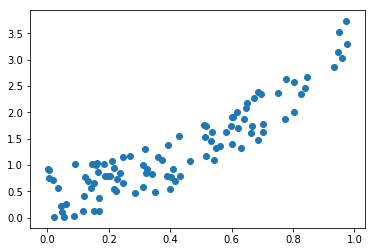

In [4]:
plt.scatter(x_input, y)

In [5]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

###  We initialize with 1 for a and b, calling them a_train and b_train

In [6]:
a_train = tensor([1.])#, 
b_train = tensor([1.])#, # This has a property called requires_grad which is set to false by default.
lr = 1e-1 # take a learning rate.
# Define the model
def model(x_in, a_in, b_in):
  #print(a_in, b_in, x_in[0:5])
  return x_in@a_in + b_in
y_hat = model(x_input, a_train, b_train)
loss = mse(y_hat, y)
loss

tensor(0.3590)

In [13]:
def do_training():
  y_hat = model(x_input, a_train, b_train)
  loss = mse(y_hat, y)
  if i % 100 == 0: print(i, loss, "a_train:", a_train, "b_train:", b_train)
  loss.backward()
  with torch.no_grad():
    a_train.sub_(lr * a_train.grad)
    b_train.sub_(lr * b_train.grad)
    a_train.grad.zero_()
    b_train.grad.zero_()

In [14]:
a_train = tensor([1.], requires_grad=True)#, 
b_train = tensor([1.], requires_grad=True)# Pytorch Autograd mechanism at play here.
lr = .01
for i in range(1000):
  do_training()

0 tensor(0.3590, grad_fn=<MeanBackward0>) a_train: tensor([1.], requires_grad=True) b_train: tensor([1.], requires_grad=True)
100 tensor(0.3022, grad_fn=<MeanBackward0>) a_train: tensor([1.1784], requires_grad=True) b_train: tensor([0.8479], requires_grad=True)
200 tensor(0.2628, grad_fn=<MeanBackward0>) a_train: tensor([1.3572], requires_grad=True) b_train: tensor([0.7619], requires_grad=True)
300 tensor(0.2322, grad_fn=<MeanBackward0>) a_train: tensor([1.5168], requires_grad=True) b_train: tensor([0.6904], requires_grad=True)
400 tensor(0.2083, grad_fn=<MeanBackward0>) a_train: tensor([1.6578], requires_grad=True) b_train: tensor([0.6277], requires_grad=True)
500 tensor(0.1898, grad_fn=<MeanBackward0>) a_train: tensor([1.7821], requires_grad=True) b_train: tensor([0.5724], requires_grad=True)
600 tensor(0.1754, grad_fn=<MeanBackward0>) a_train: tensor([1.8918], requires_grad=True) b_train: tensor([0.5237], requires_grad=True)
700 tensor(0.1642, grad_fn=<MeanBackward0>) a_train: tenso

### Print final values for a_train, b_train

In [9]:
print(a_train, b_train)

tensor([2.2156], requires_grad=True) tensor([0.3799], requires_grad=True)


Text(0.5, 1.0, 'when data is non linear')

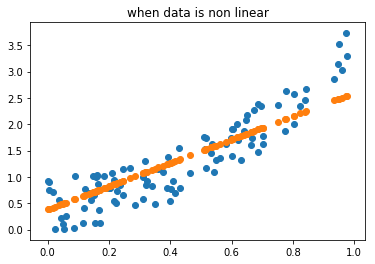

In [12]:
plt.scatter(x_input,y)
plt.scatter(x_input, model(x_input, a_train, b_train).detach().numpy())
plt.title("when data is non linear")